<a href="https://www.kaggle.com/code/madhurpant/netflix-themed-eda?scriptVersionId=106380628" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="text-align: center; background-color: #221F1F;font-size:200%; font-family:Arial; color: #E50914; padding: 20px; line-height: 1;border-radius:10px"><b>NETFLIX</b></div>

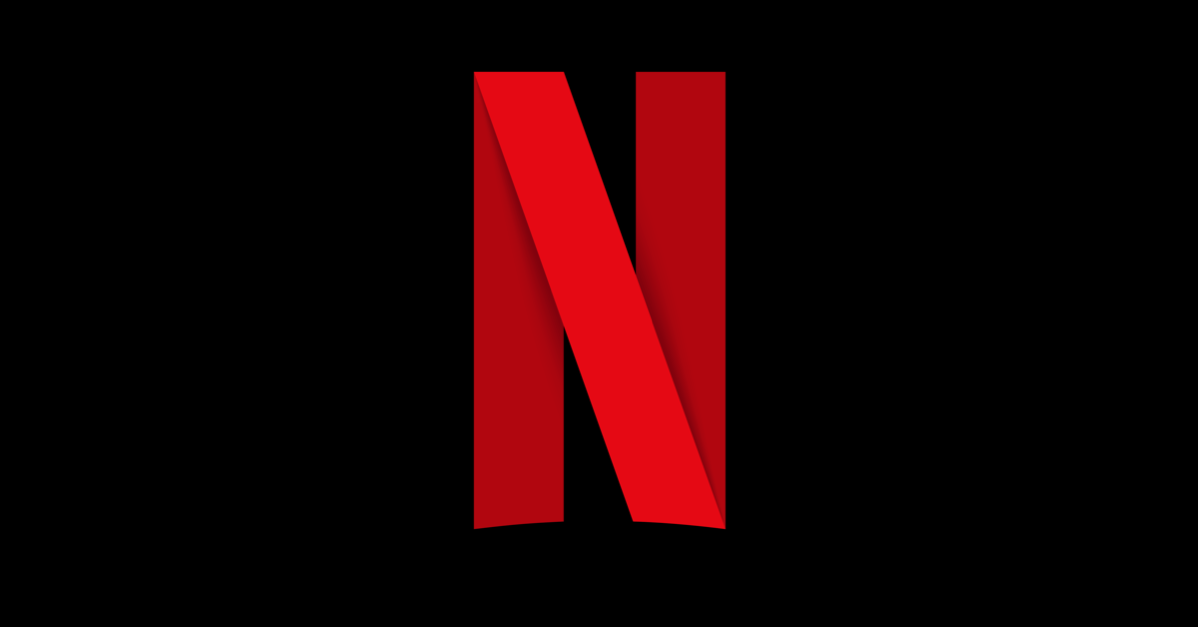

Netflix, Inc. is an American subscription streaming service and production company based in Los Gatos, California. Founded on August 29, 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California, it offers a film and television series library through distribution deals as well as its own productions, known as Netflix Originals.

<h3 style="text-align: left;background-color: #221F1F; font-family:Arial; color: #F5F5F1; padding: 14px; line-height: 1; border-radius:10px"> About Dataset</h3>

<h4>Netflix Dataset contains <mark>12 columns</mark>:</h4>


* <b> <mark>1. show_id</mark>:</b> Unique ID for every Movie / Tv Show
* <b> <mark>2. type</mark>:</b> A Movie or TV Show
* <b> <mark>3. title</mark>:</b> Title of the Movie / Tv Show
* <b> <mark>4. director</mark>:</b> Director of the Movie
* <b> <mark>5. cast</mark>:</b> Actors involved in the Movie / Show
* <b> <mark>6. country</mark>:</b> Country where the movie / show was produced
* <b> <mark>7. date_added</mark>:</b> Date it was added on Netflix 
* <b> <mark>8. release_year</mark>:</b> Actual Release year of the move / show
* <b> <mark>9. rating</mark>:</b> TV Rating of the movie / show
* <b> <mark>10. duration</mark>:</b> Total Duration - in minutes or number of seasons
* <b> <mark>11. listed_in</mark>:</b> Genre of the Movie/TV Show
* <b> <mark>12. description</mark>:</b> Summary of the Movie/TV Show



<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #221F1F; font-family:Arial; color: #F5F5F1; padding: 14px; line-height: 1; border-radius:10px">Table of Contents</h3>
    
   * [1. Import Necessary Libraries](#1)
   * [2. Data Cleaning](#2)
   * [3. Exploratory Data Analysis](#3)
    - [3.1. Age Group Analysis](#3.1)
        - [3.1.1. Age Group Countplot](#3.1.1)
        - [3.1.2. Age Group Sunburst](#3.1.2)
    - [3.2. Year Analysis](#3.2)
        - [3.2.1. Year Countplot](#3.2.1)
        - [3.2.2. Year Age Treemap](#3.2.2)
    - [3.3. Country Analysis](#3.3)
        - [3.3.1. Top 10 Countries](#3.3.1)
        - [3.3.2. World Map Plot](#3.3.2)
    - [3.4. Movie Duration Analysis](#3.4)
        - [3.4.1. Movie Duration Histplot](#3.4.1)
        - [3.4.2. Duration vs Age Boxplot](#3.4.2)
    - [3.5. Word Clouds](#3.5)
        - [3.5.1. Movie Wordcloud](#3.5.1)
        - [3.5.2. TV Shows Wordcloud](#3.5.2)
   * [4. Acknowledgements](#4)

<a id="1"></a>
# <div style="font-size:40px; text-align: center; background-color: #B81D24; font-family:Arial; color: #F5F5F1; padding: 14px; line-height: 1;border-radius:20px">1. Import Libraries</div>

In [1]:
# data
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud
import missingno as msno

# styling
%matplotlib inline

colors = ['#E50914', '#B81D24', '#221F1F', '#F5F5F1']

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
df = pd.read_csv('../input/netflix-shows/netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
pd.DataFrame(df.nunique())

,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


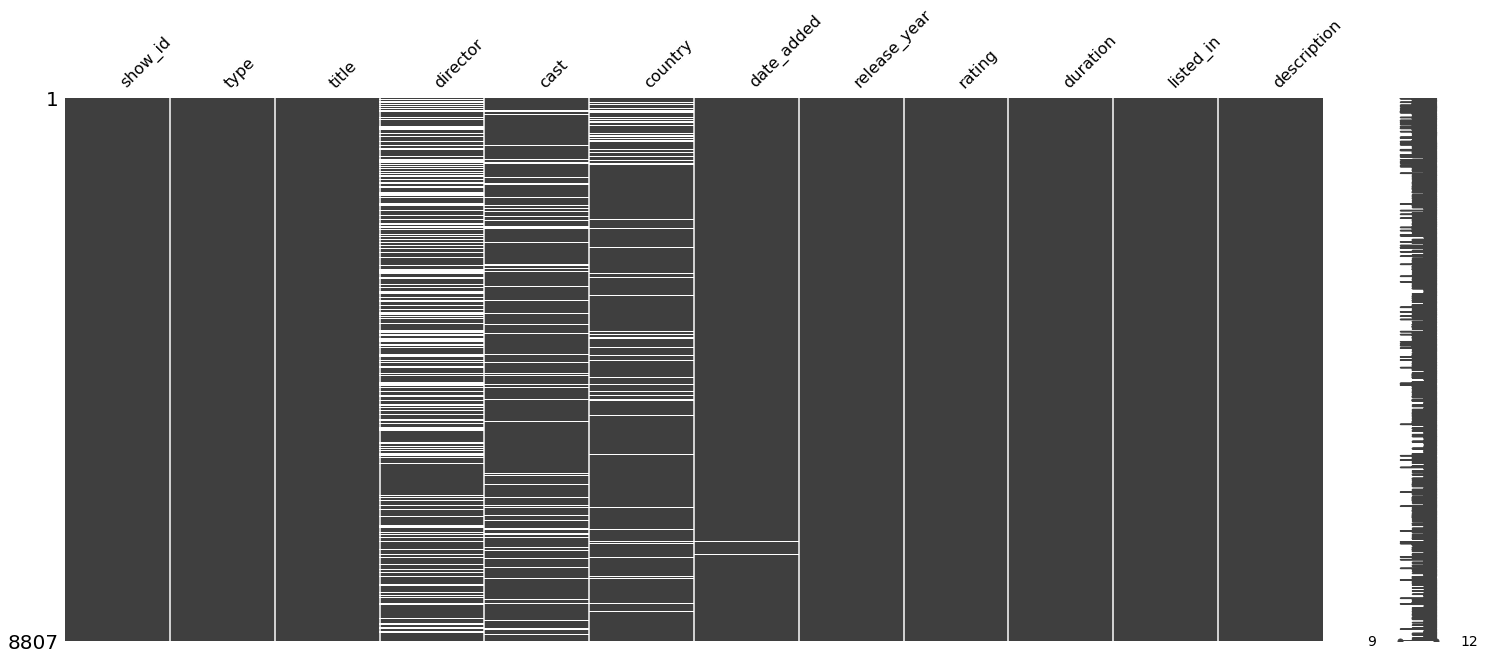

In [6]:
msno.matrix(df);

<a id="2"></a>
# <div style="font-size:40px; text-align: center; background-color: #B81D24; font-family:Arial; color: #F5F5F1; padding: 14px; line-height: 1;border-radius:20px">2. Data Cleaning</div>

In [7]:
# Dropping Directors and Cast
df.drop(['director', 'cast'], axis=1, inplace=True)

In [8]:
df.isna().sum()

show_id           0
type              0
title             0
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

In [9]:
df['date'] = pd.to_datetime(df['date_added'])
df['year'] = df['date'].apply(lambda datetime: datetime.year)
df['month'] = df['date'].apply(lambda datetime: datetime.month)

In [10]:
rating_age_groups = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['age_group'] = df['rating'].replace(rating_age_groups)

# Remove Insignificant Rating Values from DF
to_remove_ratings = ['74 min', '84 min', '66 min']
df = df[-df['rating'].isin(to_remove_ratings)]

In [11]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,date,year,month,age_group
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0,9.0,Teens
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0,9.0,Adults
2,s3,TV Show,Ganglands,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,2021.0,9.0,Adults
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,2021.0,9.0,Adults
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,2021.0,9.0,Adults


In [12]:
# Filling Unknown in Missing Cells
df['country'].fillna('Unknown', inplace=True)

# Counting just the first country
df['country'] = df['country'].apply(lambda x: x.split(",")[0])
df['country'].value_counts()

United States     3208
India             1008
Unknown            831
United Kingdom     628
Canada             271
                  ... 
Namibia              1
Senegal              1
Luxembourg           1
Syria                1
Somalia              1
Name: country, Length: 87, dtype: int64

In [13]:
df = df.dropna()

In [14]:
df['year'] = df['year'].astype('int')

years = [2016, 2017, 2018, 2019, 2020, 2021]
df = df[df['year'].isin(years)]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8652 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8652 non-null   object        
 1   type          8652 non-null   object        
 2   title         8652 non-null   object        
 3   country       8652 non-null   object        
 4   date_added    8652 non-null   object        
 5   release_year  8652 non-null   int64         
 6   rating        8652 non-null   object        
 7   duration      8652 non-null   object        
 8   listed_in     8652 non-null   object        
 9   description   8652 non-null   object        
 10  date          8652 non-null   datetime64[ns]
 11  year          8652 non-null   int64         
 12  month         8652 non-null   float64       
 13  age_group     8652 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(10)
memory usage: 1013.9+ KB


In [16]:
df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,date,year,month,age_group
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021,9.0,Teens
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021,9.0,Adults
2,s3,TV Show,Ganglands,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,2021,9.0,Adults
3,s4,TV Show,Jailbirds New Orleans,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,2021,9.0,Adults
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,2021,9.0,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019-11-20,2019,11.0,Adults
8803,s8804,TV Show,Zombie Dumb,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019-07-01,2019,7.0,Older Kids
8804,s8805,Movie,Zombieland,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019-11-01,2019,11.0,Adults
8805,s8806,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020-01-11,2020,1.0,Older Kids


In [17]:
# Movies Dataframe
df_movies = df[df['type'] == 'Movie']

# TV Shows Dataframe
df_shows = df[df['type'] == 'TV Show']

<a id="3"></a>
# <div style="font-size:40px; text-align: center; background-color: #B81D24; font-family:Arial; color: #F5F5F1; padding: 14px; line-height: 1;border-radius:20px">3. Exploratory Data Analysis</div>

In [18]:
fig=px.histogram(data_frame=df,x='type',color='type',template='plotly_dark',color_discrete_sequence=['#E50914','#F5F5F1'],
                 text_auto=True,barmode='stack')
fig.update_traces(textfont_size=20, textangle=0, textposition="outside", cliponaxis=False)
fig.update_traces( marker_line_color='#221F1F',
                  marker_line_width=3.5)
fig.show()

<a id="3.1"></a>
<h3 style="font-size:25px; text-align: left;background-color: #B81D24; font-family:Arial; color: #F5F5F1; padding: 16px; line-height: 1; border-radius:10px"> 3.1 Age Group Analysis</h3>

<a id="3.1.1"></a>
<span style="font-size:20px; color:#B81D24; font-family:Arial;"> <b>3.1.1 Age Group Countplot</b></span>

In [19]:
fig=px.histogram(data_frame=df,x='age_group',color='age_group',template='plotly_dark',color_discrete_sequence=['#E50914','#F5F5F1'],
                 text_auto=True,barmode='stack')
fig.update_traces(textfont_size=20, textangle=0, textposition="outside", cliponaxis=False)
fig.update_traces( marker_line_color='#221F1F',
                  marker_line_width=3.5)
fig.show() 

<a id="3.1.2"></a>
<span style="font-size:20px; color:#B81D24; font-family:Arial;"> <b>3.1.2 Age Group Sunburst</b></span>

In [20]:
age_df = df.groupby(['type', 'age_group']).size().reset_index().rename(columns={0: 'count'})

fig = px.sunburst(age_df, values='count', path=['type', 'age_group'], template='plotly_dark')
fig.update_traces(textinfo="label+percent parent")
fig.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#B81D24;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
1) 70% of the Content on Netflix are Movies.<br>
2) 48% of the Movies released are Adult compared to 43% for Shows.<br>
3) Approx 2000 Movies and Shows are for kids.
    
</p>

</div>


<a id=""></a>

<div style="background-color:#221F1F; height:20px; width:100%; border-radius:5px;">

<a id="3.2"></a>
<h3 style="font-size:25px; text-align: left;background-color: #B81D24; font-family:Arial; color: #F5F5F1; padding: 16px; line-height: 1; border-radius:10px"> 3.2 Year Analysis</h3>

<a id="3.2.1"></a>
<span style="font-size:20px; color:#B81D24; font-family:Arial;"> <b>3.2.1 Year Countplot</b></span>

In [21]:
fig=px.histogram(data_frame=df,x='year',color='year',template='plotly_dark',color_discrete_sequence=['#E50914','#F5F5F1'],
                 text_auto=True,barmode='stack')
fig.update_traces(textfont_size=20, textangle=0, textposition="outside", cliponaxis=False)
fig.update_traces( marker_line_color='#221F1F',
                  marker_line_width=3.5)
fig.show()

<a id="3.2.2"></a>
<span style="font-size:20px; color:#B81D24; font-family:Arial;"> <b>3.2.2 Year and Age TreeMap </b></span>

In [22]:
year_df = df.groupby(['year', 'age_group']).size().reset_index().rename(columns={0: 'count'})

fig = px.treemap(year_df, values='count', path=['year', 'age_group'], template='plotly_dark')
fig.update_traces(textinfo="label+percent parent")
fig.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#B81D24;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
1) Content on Netflix started booming from 2016.<br>
2) Peaked in 2019 with more than 2000 Movies/Shows being added on Netflix.<br>
3) New Content starts to decrease from 2020 onwards.
    
</p>

</div>


<a id=""></a>

<div style="background-color:#221F1F; height:20px; width:100%; border-radius:5px;">

<a id="3.3"></a>
<h3 style="font-size:25px; text-align: left;background-color: #B81D24; font-family:Arial; color: #F5F5F1; padding: 16px; line-height: 1; border-radius:10px"> 3.3 Country Analysis</h3>

<a id="3.3.1"></a>
<span style="font-size:20px; color:#B81D24; font-family:Arial;"> <b>3.3.1 Top 10 Countries Plot </b></span>

In [23]:
country_dict = {'Country': df.groupby('country').size().sort_values(ascending=False)[:10].index,
             'Number of Movies/Shows': df.groupby('country').size().sort_values(ascending=False)[:10].values
             }

df_temp = pd.DataFrame(data=country_dict, columns=['Country', 'Number of Movies/Shows'])
fig = px.bar(df_temp, x="Country",
                   y="Number of Movies/Shows",
                   color='Number of Movies/Shows',
                   text_auto=True,
                   color_continuous_scale=[(0, "#F5F5F1"), (1, '#E50914')],
                   template='plotly_dark')

fig.show()

<a id="3.3.2"></a>
<span style="font-size:20px; color:#B81D24; font-family:Arial;"> <b>3.3.2 World Map Plot </b></span>

In [24]:
country_df = df.groupby(['country']).size().reset_index().rename(columns={0: 'count'})

fig = px.choropleth(country_df, locations="country", color="count", 
                    locationmode='country names',
                    range_color=[0,3100],
                    color_continuous_scale=[(0, "#F5F5F1"), (1, '#E50914')],
                    template='plotly_dark'
                   )

fig.update_layout(title='Content by Countries')
fig.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#B81D24;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
1) USA, India and UK are the top 3 and are crucial.<br>
2) More than 800 Locations are unknown.<br>
3) Most of the Countries have contributed.
    
</p>

</div>


<a id=""></a>

<div style="background-color:#221F1F; height:20px; width:100%; border-radius:5px;">

<a id="3.4"></a>
<h3 style="font-size:25px; text-align: left;background-color: #B81D24; font-family:Arial; color: #F5F5F1; padding: 16px; line-height: 1; border-radius:10px"> 3.4 Movie Duration Analysis</h3>

<a id="3.4.1"></a>
<span style="font-size:20px; color:#B81D24; font-family:Arial;"> <b>3.4.1 Movie Duration Histplot </b></span>

In [25]:
df_movies['duration'] = df_movies['duration'].str.replace(' min', '')
df_movies['duration'] = df_movies['duration'].astype('int')

fig = px.histogram(df_movies, x="duration", marginal="rug",
                   hover_data=['duration', 'title', 'country', 'date_added', 'age_group', 'listed_in', 'description'],
                   color_discrete_sequence=colors, template='plotly_dark')

fig.show()

<a id="3.4.2"></a>
<span style="font-size:20px; color:#B81D24; font-family:Arial;"> <b>3.4.2 Duration vs Age Boxplot </b></span>

In [26]:
fig = px.box(df_movies, x="duration", y='age_group', color='age_group', notched=True, template='plotly_dark')
fig.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#B81D24;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
1) Many Movies lie in the 90 - 100 minute range.<br>
2) Anything Outside the 45 - 157 minute range can be considered as an outlier.<br>
3) Order of Movie Duration (Teens > Adults > Older Kids > Kids).
    
</p>

</div>


<a id=""></a>

<div style="background-color:#221F1F; height:20px; width:100%; border-radius:5px;">

<a id="3.5"></a>
<h3 style="font-size:25px; text-align: left;background-color: #B81D24; font-family:Arial; color: #F5F5F1; padding: 16px; line-height: 1; border-radius:10px"> 3.5 WordClouds</h3>

<a id="3.5.1"></a>
<span style="font-size:20px; color:#B81D24; font-family:Arial;"> <b>3.5.1 Movies Wordcloud </b></span>

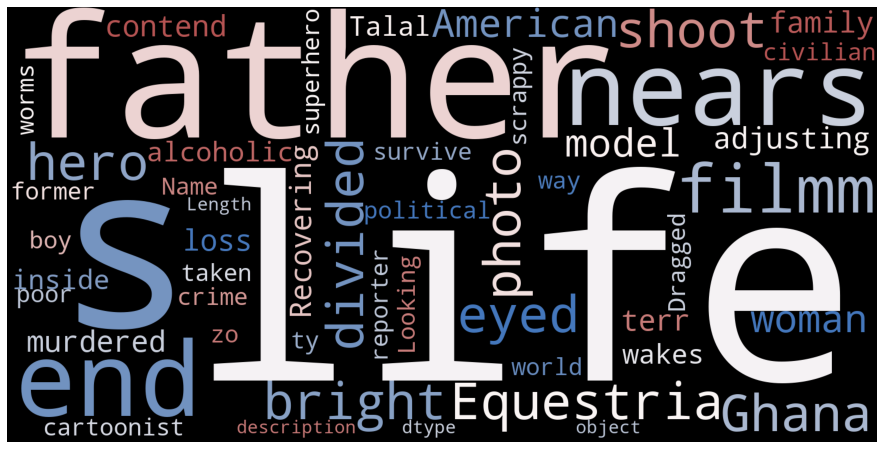

In [27]:
text = str(df_movies['description'])

plt.rcParams['figure.figsize'] = (16, 8)
wordcloud = WordCloud(background_color = 'black', colormap='vlag', width = 1600,  height = 800, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<a id="3.5.2"></a>
<span style="font-size:20px; color:#B81D24; font-family:Arial;"> <b>3.5.2 TV Shows Wordcloud </b></span>

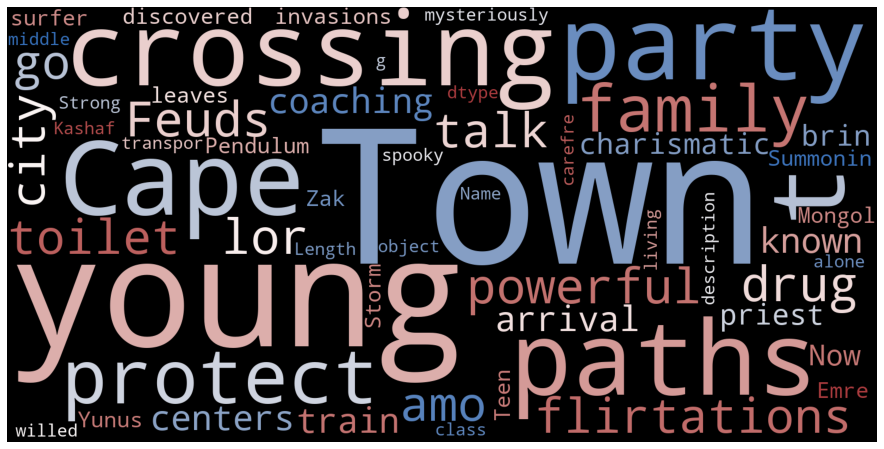

In [28]:
text = str(df_shows['description'])

plt.rcParams['figure.figsize'] = (16, 8)
wordcloud = WordCloud(background_color = 'black', colormap='vlag', width = 1600,  height = 800, max_words = 125).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<a id="4"></a>
# <div style="font-size:40px; text-align: center; background-color: #B81D24; font-family:Arial; color: #F5F5F1; padding: 14px; line-height: 1;border-radius:20px">4. Acknowledgements</div>

1) https://www.kaggle.com/code/wonduk/eda-on-data-science-job-salaries

2) https://www.kaggle.com/code/andreshg/eda-beginner-to-expert-plotly#Distribution-of-content-released

[Back to Index](#top)

# <div style="text-align: center; background-color: #221F1F;font-size:200%; font-family:Arial; color: #E50914; padding: 20px; line-height: 1;border-radius:10px"><b>THE END</b></div>